# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Nursyahrina
- Email: nursyahrina17@gmail.com
- Id Dicoding: nursyahrina

## Menentukan Pertanyaan Bisnis

- Bagaimana kinerja penjualan dan revenue perusahaan tiap bulannya dalam 2 tahun terakhir?
- Kategori produk mana yang paling diminati dan yang paling kurang diminati dalam hal penjualan?
- Produk kategori mana yang menghasilkan revenue tertinggi dan terendah?
- Bagaimana demografi pelanggan yang kita miliki?
- Siapa saja pelanggan terbaik berdasarkan analisis RFM?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Data Customers

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Load Data Orders

In [3]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Load Data Order Items

In [4]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Load Data Order Reviews

In [5]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Load Data Products

In [6]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Terkait dengan data produk yang telah dimuat, ditemukan bahwa nama kategori produk awalnya disusun dalam bahasa Portugis. Sebelum melanjutkan analisis data lebih lanjut, akan dilakukan proses **translasi ke dalam bahasa Inggris** dengan memanfaatkan informasi translasi nama kategori produk yang telah tersedia dalam dataset. Dengan ini, diharapkan hasil dari analisis data nantinya akan menjadi lebih mudah dipahami.

In [7]:
category_trans = pd.read_csv('data/product_category_name_translation.csv')
category_trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
products_df = products_df.merge(category_trans, left_on='product_category_name', right_on='product_category_name', how='left')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [9]:
products_df = products_df.drop(columns=['product_category_name'])
products_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### Load Data Sellers

In [10]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Dalam tahap ini, evaluasi akan dilakukan terhadap kualitas seluruh data yang akan digunakan. Tujuan dari evaluasi ini adalah untuk mengidentifikasi berbagai masalah yang mungkin ada dalam data tersebut, seperti nilai dan tipe data yang tidak sesuai, keberadaan data yang hilang, serta adanya duplikasi data.

#### Menilai Data Customers 

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
customers_df.describe(include="O")

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [15]:
distinct_customers_df = customers_df.drop(columns='customer_id')

In [16]:
print("Jumlah duplikasi: ", distinct_customers_df.duplicated().sum())

Jumlah duplikasi:  3089


Berdasarkan hasil assessment data, ditemukan bahwa data customer sudah lengkap dan tidak ada incorrect data maupun tipe data. Secara keseluruhan juga tidak ada duplikasi data. Namun setelah diteliti lebih lanjut, ternyata ada cukup banyak duplikasi pada data customer. Data customer_id dibuat berbeda untuk setiap order yang dilakukan, menyebabkan **duplikasi pada data pelanggan awal** yang hanya mencakup `customer_unique_id`, `customer_city`, dan `customer_state`. Jika duplikasi ini tidak dihapus akan mempengaruhi hasil analisis data, oleh karena itu perlu dibuat dataframe terpisah untuk analisis khusus data customer.

#### Menilai Data Orders 

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil assessment data, terdapat beberapa kolom data yang memiliki **definisi tipe data yang kurang tepat**, khususnya kolom yang memuat informasi waktu yang semestinya memiliki tipe data datetime. Selain itu, dalam beberapa kolom waktu tersebut, **ditemukan keberadaan missing values**, namun beruntungnya, tidak ada duplikasi data yang terdeteksi.

Terkait dengan data waktu yang hilang, jika diamati lebih lanjut kita dapat melihat bahwa ada atau tidaknya data waktu pada beberapa kolom tersebut ada kaitannya dengan status ordernya.

In [21]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [22]:
orders_df[orders_df.order_status == "delivered"].sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
86110,23371f485b357c6cc3987ceec664e973,7e5e938f81a54af60f28aebba0d4e899,delivered,2018-07-14 11:33:55,2018-07-17 05:30:39,2018-07-17 14:00:00,2018-07-26 18:36:33,2018-08-03 00:00:00
66604,72f3f62e2e4208804e2c4ed8a28ead52,330786b82d1da4f900da3f8124a9f4f0,delivered,2018-07-19 08:50:45,2018-07-20 05:05:16,2018-07-20 11:01:00,2018-07-25 20:29:45,2018-08-02 00:00:00


In [23]:
orders_df[orders_df.order_status == "shipped"].sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
29078,296354937d156bb322d68e56f8e2729d,74bd86ec34be047727c52fdc45c9447b,shipped,2018-06-18 15:55:12,2018-06-18 16:41:21,2018-06-19 09:24:00,NaN,2018-07-24 00:00:00
35641,1e40acbc25a8373a85419489d08d2fc9,f445bec4e10f9b0252da3607c053a41b,shipped,2017-11-22 00:18:00,2017-11-22 00:29:23,2017-11-22 20:23:31,NaN,2017-12-22 00:00:00


In [24]:
orders_df[orders_df.order_status == "canceled"].sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
94106,964bc1b427d6a485b515efcab9985e68,45ee903a8b62062d099b7c58fb4cc127,canceled,2018-02-25 21:11:16,2018-02-25 21:25:23,NaN,NaN,2018-03-19 00:00:00
75124,05b3514bb9492bc0eb20959fbf445927,f08cbd00eae908d02c0c4984598f1d2e,canceled,2017-08-03 19:04:35,2017-08-03 19:15:23,NaN,NaN,2017-08-28 00:00:00


Dapat dilihat bahwa data waktu berkaitan dengan status order, data waktu yang lengkap hanya akan ada pada order yang statusnya sudah `delivered`, karena berarti barang yang dipesan sudah sampai ditangan customer, sehingga seluruh timeline waktunya jelas. Beda halnya dengan order yang statusnya masih `shipped` yang berarti paket barang masih diperjalanan, sehingga belum ada data `order_delivered_customer_date` nya. Beda lagi dengan order dengan status `canceled`, bisa saja tidak memiliki ketiga data waktu `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` tersebut, atau 1 atau 2 diantaranya saja, karena diasumsikan customer dapat membatalkan pesanannya kapan saja sebelum barang yang dipesan sampai ke alamatnya.

#### Menilai Data Order Items 

In [25]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Dari info data sepertinya tipe data `shipping_limit_date` masih belum tepat.

In [26]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [27]:
order_items_df.describe(include="O")

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


Dari analisis deskripsi di atas dapat dilihat bahwa terdapat **nilai maksimum yang sangat besar** pada seluruh kolom data numerik. Pertama perlu diketahui terlebih dahulu penyebabnya dengan melihat order yang memiliki nilai `order_item_id` mencapai 21

In [28]:
order_items_df[order_items_df.order_id == order_items_df[order_items_df.order_item_id == 21].order_id.values[0]]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


Setelah dilakukan pemeriksaan lebih lanjut, terungkap bahwa penyebab dari kemungkinan munculnya `order_item_id` hingga angka 21, yang jauh melebihi nilai jangkauan standarnya, adalah karena adanya banyak jumlah barang yang dipesan dalam satu transaksi. Ternyata, dalam tabel data ini, tidak terdapat atribut kuantitas barang yang dibeli, sehingga setiap catatan data secara lengkap merepresentasikan setiap barang fisik yang telah dibeli. Dengan kata lain, satu catatan atau baris data setara dengan satu barang yang dibeli, bukan satu produk secara keseluruhan. Hal ini mengindikasikan bahwa **bukan data itu sendiri yang bermasalah**, melainkan mungkin struktur tabel yang memungkinkan terjadinya data yang redundan.

In [29]:
products_df[products_df.product_id == order_items_df[order_items_df.price == order_items_df.price.max()].product_id.values[0]]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
5899,489ae2aa008f021502940f251d4cce7f,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares


Nilai maksimum `price` pada data order items juga jauh melebihi jangkauan standarnya, namun setelah diselidiki barang yang memiliki harga mencapai 6735 cukup masuk akal mempertimbangkan **kategorinya houseware** dan berat produk yang mencapai **30 kilogram**. 

In [30]:
products_df[products_df.product_id == order_items_df[order_items_df.freight_value == order_items_df.freight_value.max()].product_id.values[0]]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
4142,ec31d2a17b299511e7c8627be9337b9b,44.0,385.0,6.0,14675.0,55.0,64.0,52.0,baby


In [31]:
orders_df[orders_df.order_id == order_items_df[order_items_df.freight_value == order_items_df.freight_value.max()].order_id.values[0]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
50468,a77e1550db865202c56b19ddc6dc4d53,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,2018-04-19 06:55:13,2018-04-19 18:32:29,2018-04-27 19:45:00,2018-05-17 00:00:00


Kolom `freight_value` pada data order items juga memiliki nilai maksimum yang jauh melebihi jangkauan standarnya, namun setelah diselidiki barang yang memiliki freight value mencapai 409.68 cukup masuk akal mempertimbangkan berat produk yang hampir mencapai **15 kilogram** dan **lama waktu pengiriman mencapai 1 bulan**. Berat barang dan jauhnya jarak pengiriman mungkin mempengaruhi besarnya freight value suatu barang. 

Pemeriksaan pada nilai maksimum data order items ini menunjukkan bahwa seluruh data diperkirakan sudah akuarat nilainya, berdasarkan asumsi-asumsi yang telah dijelaskan sebelumnya.

In [32]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Jadi, dari hasil evaluasi data order items ini, kesalahan yang ditemukan hanyalah **ketidaktepatan dalam tipe data** `shipping_limit_date`, yang seharusnya berupa tipe data datetime, namun saat ini dianggap sebagai objek.

#### Menilai Data Order Reviews 

In [33]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [34]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
order_reviews_df.describe(include="O")

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


In [37]:
order_reviews_df["order_id"].value_counts().sort_values(ascending=False).head(5)

order_id
c88b1d1b157a9999ce368f218a407141    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
8e17072ec97ce29f0e1f111e598b0c85    3
565b0bdb5bfef65df5a23890967586f6    2
Name: count, dtype: int64

In [38]:
order_reviews_df[order_reviews_df["order_id"] == "c88b1d1b157a9999ce368f218a407141"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
82525,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
89360,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


Dapat dilihat di atas bahwa terdapat 3 review untuk 1 order. Dalam kasus seperti ini, karena tidak ada keterangan lebih lanjut, kita asumsikan bahwa customer melakukan review beberapa kali untuk memperbaiki atau mengedit reviewnya. Hal ini dapat menyebabkan data menjadi ambigu, karena itu dapat kita bersihkan dengan cara mengambil data review yang diinputkan paling terakhir oleh customer dengan melihat timestamp waktu review paling besar.

In [39]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil penilaian data, terdapat **sejumlah besar data yang hilang** dalam kolom `review_comment_title` dan `review_comment_message`. Jumlah data yang hilang ini jauh melebihi 50% dari total data yang ada. Selain itu, **tipe data** pada kolom `review_creation_date` dan `review_answer_timestamp` juga **tidak tepat**, sebaiknya diubah menjadi tipe data datetime karena lebih tepat dalam konteks penggunaannya. Selain itu juga terdapat **data ambigu yaitu beberapa review untuk 1 data order**, yang sebaiknya dibersihkan sebelum melakukan eksplorasi lebih lanjut.

#### Menilai Data Products 

In [40]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
products_df.isna().sum()

product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [42]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [43]:
products_df.describe(include="O")

,product_id,product_category_name_english
count,32951,32328
unique,32951,71
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table
freq,1,3029


In [44]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil penilaian data, ditemukan bahwa sejumlah **data yang tidak lengkap** atau hilang pada seluruh kolom, kecuali pada kolom id Selain itu, **tipe data float kurang tepat** pada kolom `product_name_length`, `product_description_length`, dan `product_photos_qty` sebaiknya diubah menjadi integer karena sifat data dalam kolom-kolom tersebut bersifat diskrit dan lebih tepat direpresentasikan dengan tipe data integer.

#### Menilai Data Sellers 

In [45]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [47]:
sellers_df.describe(include="O")

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


In [48]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil assessment data seller, secara keseluruhan, tidak ada kejanggalan yang dapat ditemukan dalam data tersebut. Data sudah lengkap dan akurat baik dalam hal tipe data maupun rentang nilai yang digunakan.

### Cleaning Data

#### Membersihkan Data Customers

Duplikasi ditemukan pada data customer awal karena setiap melakukan order, akan dibuat record data baru dengan `customer_id` yang baru yang berbeda dengan `customer_unique_id`. Karena itu diperlukan dataframe baru untuk analisis khusus data customer saja dan tanpa duplikasi.

In [49]:
distinct_customers_df.drop_duplicates(inplace=True)

In [50]:
print("Jumlah duplikasi: ", distinct_customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan Data Orders

##### Menangani Kesalahan Tipe Data 
Masalah yang ditemukan pada data orders adalah tipe data yang tidak tepat untuk informasi waktu, oleh karena itu dilakukan konversi dari tipe data object ke datetime.

In [51]:
datetime_columns = ['order_purchase_timestamp',
                    'order_approved_at', 
                    'order_delivered_carrier_date',
                    'order_delivered_customer_date', 
                    'order_estimated_delivery_date']
 
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [52]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Menangani Missing Values

Selain tipe datanya yang salah, kita juga menemukan data waktu yang hilang pada 3 kolom timeline order. Karena kita tidak memiliki pertanyaan yang berkaitan dengan timeline order atau efisiensi waktu, oleh karena itu kali ini kita dapat membuang saja seluruh data pada ketiga kolom timeline waktu tersebut.

In [53]:
orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date'], 
               inplace=True)

In [54]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan Data Order Items

##### Menangani Kesalahan Tipe Data 
Masalah yang ditemukan pada data order items adalah tipe data yang tidak tepat untuk informasi waktu pada kolom `shipping_limit_date`, oleh karena itu dilakukan konversi dari tipe data object ke datetime.

In [55]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

#### Membersihkan Data Order Reviews

##### Menangani Missing Values
Jumlah nilai yang hilang pada kolom `review_comment_title` dan `review_comment_message` melebihi 50% dari total data yang ada. Besarnya jumlah nilai yang hilang menunjukkan bahwa kedua data tersebut tidak dapat menggambarkan keseluruhan data dengan baik. Selain itu, data tekstual tersebut tidak akan digunakan untuk analisis lebih lanjut. Dengan mempertimbangkan hal-hal tersebut, diputuskan untuk menghapus kedua kolom data agar data menjadi lebih bersih dan lebih representatif.

In [56]:
order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

##### Menangani Kesalahan Tipe Data 
Masalah lain yang ditemukan pada data order reviews adalah tipe data yang tidak tepat untuk informasi waktu pada kolom `review_creation_date` dan `review_answer_timestamp`, oleh karena itu dilakukan konversi dari tipe data object ke datetime.

In [57]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

##### Menangani Data Ambigu
Masalah selanjutnya yang ada pada data order reviews adalah terdapat data ambigu yaitu beberapa review untuk 1 data order. Untuk menanganinya dapat dilakukan dengan cara mengambil data review yang diinputkan paling terbaru/terakhir oleh customer dengan melihat timestamp waktu review (`review_answer_timestamp`) paling besar dan menghapus data sebelumnya.

In [58]:
order_reviews_df = order_reviews_df.sort_values(by='review_answer_timestamp', ascending=False)
order_reviews_df = order_reviews_df.drop_duplicates(subset='order_id', keep='first')
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
65485,e186ae2c3f1ff37c06947a8ad90e94bb,4f04661f0e0a1a23f6d87956884f4a02,5,2017-07-20,2017-07-23 16:54:35
7515,ba84ac038dad1ac2f446f53406f0b760,6aa0a6611260e7a3288dd6e2864f67eb,3,2017-10-21,2017-10-22 01:54:57
62108,324ea4f04f9460297a9ec07b7dfe49a7,abe6c06151a1d6382d63f49beb812f40,4,2017-12-06,2017-12-06 22:21:49
8752,9d4df583085fec1900dfac4efd0b085a,2e32dea8a4d1ae5499a67674b387bc6a,1,2016-10-28,2016-10-31 05:02:55
24123,f9090d20c3ab814d65ca10422555428d,f30d4b0d595c335bb07075291527f56a,5,2018-06-14,2018-06-15 01:35:21


#### Membersihkan Data Products

##### Menangani Missing Values
Terdapat sejumlah data yang hilang dalam seluruh kolom data produk (kecuali kolom `product_id`). Jumlah data yang hilang bervariasi antara 2 hingga 623 data. Karena jumlah ini dianggap cukup kecil, penanganan untuk membersihkan data produk ini dapat dilakukan dengan metode imputasi, yaitu mengisikan nilai tertentu ke data yang hilang.

Data pada kolom `product_category_name_english` adalah data kategorik yang bertipe objek. Oleh karena itu, nilai yang paling cocok untuk mengisi nilai yang hilang adalah nilai mode dari kategori tersebut.

Sementara itu, data lainnya memiliki tipe data numerik (float). Idealnya, kita perlu melihat lebih lanjut distribusi dari tiap-tiap data numerik tersebut untuk menentukan nilai yang paling tepat sebagai pengganti data yang hilang. Namun, secara umum, nilai yang digunakan adalah mean atau median. Mean cocok untuk data yang berdistribusi normal, sedangkan median lebih cocok untuk data dengan distribusi yang tidak normal atau cenderung skewed.

Untuk kasus ini, pada awalnya kita asumsikan distribusi data tidak normal, sehingga untuk imputasi nilai yang hilang, kita akan menggunakan nilai median dari masing-masing data.

In [59]:
category_mode = products_df['product_category_name_english'].mode()[0]
category_mode

'bed_bath_table'

In [60]:
products_df['product_category_name_english'].fillna(value=category_mode, inplace=True)

In [61]:
products_df.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [62]:
cols_to_impute = ['product_name_lenght', 'product_description_lenght',
                  'product_photos_qty', 'product_weight_g', 'product_length_cm',
                  'product_height_cm', 'product_width_cm']

for col in cols_to_impute:
    products_df[col].fillna(value=products_df[col].median(), inplace=True)

In [63]:
products_df.isna().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

##### Menangani Kesalahan Tipe Data 
Masalah lain yang ditemukan pada data products adalah tipe data yang tidak tepat pada kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` sebaiknya diubah menjadi integer, oleh karena itu dilakukan konversi dari tipe data float ke integer.

In [64]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype(int)
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype(int)
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)

Setelah proses penilaian, data telah dibersihkan, dan tidak ada lagi permasalahan seperti nilai yang hilang, tipe data yang tidak sesuai, atau duplikasi data. Langkah berikutnya adalah memulai analisis data menggunakan metode Exploratory Data Analysis.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data Customers

Untuk analisis EDA customer, data yang digunakan adalah data `distinct_customers_df` yang berisi data unik customer. Hal ini bertujuan agar analisis demografi yang dilakukan lebih valid dan tidak terpengaruh oleh duplikasi data, seperti yang telah dijelaskan sebelumnya pada tahapan assessment atau penilaian data.

In [65]:
distinct_customers_df.describe(include='all')

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96352,96352.000000,96352,96352
unique,96096,NaN,4119,27
top,3e43e6105506432c953e165fb2acf44c,NaN,sao paulo,SP
freq,3,NaN,15013,40405
mean,NaN,35173.157381,NaN,NaN
std,NaN,29795.421928,NaN,NaN
min,NaN,1003.000000,NaN,NaN
25%,NaN,11390.000000,NaN,NaN
50%,NaN,24435.000000,NaN,NaN
75%,NaN,59022.000000,NaN,NaN


Berdasarkan deskripsi data diatas, diketahui bahwa terdapat **96,906 customer** (teridentifikasi data jumlah id uniknya) yang tersebar di **4,119 kota** dalam **27 negara bagian Brazil**. Informasi pada data customer ini sangat terbatas sehingga kita tidak dapat mengetahui lebih lanjut tentang demografi pelanggan berdasarkan usia atau jenis kelamin, namun kita dapat mengetahui persebaran customer di setiap kota atau negara bagian.

In [66]:
city_counts = distinct_customers_df['customer_city'].value_counts()
city_counts_percent = distinct_customers_df['customer_city'].value_counts(normalize=True)
city_info = pd.DataFrame({'City': city_counts.index, 
                          'Number_of_Customers': city_counts.values, 
                          'Percentage': city_counts_percent.values * 100})
city_info

,City,Number_of_Customers,Percentage
0,sao paulo,15013,15.581410
1,rio de janeiro,6642,6.893474
2,belo horizonte,2681,2.782506
3,brasilia,2072,2.150448
4,curitiba,1466,1.521504
...,...,...,...
4114,bequimao,1,0.001038
4115,andarai,1,0.001038
4116,quilometro 14 do mutum,1,0.001038
4117,curvelandia,1,0.001038


In [67]:
state_counts = distinct_customers_df['customer_state'].value_counts()
state_counts_percent = distinct_customers_df['customer_state'].value_counts(normalize=True)
state_info = pd.DataFrame({'State': state_counts.index, 
                          'Number_of_Customers': state_counts.values, 
                          'Percentage': state_counts_percent.values * 100})
state_info

,State,Number_of_Customers,Percentage
0,SP,40405,41.934781
1,RJ,12422,12.892312
2,MG,11286,11.713301
3,RS,5285,5.485096
4,PR,4889,5.074103
5,SC,3539,3.672991
6,BA,3281,3.405223
7,DF,2079,2.157713
8,ES,1971,2.045624
9,GO,1955,2.029019


Ternyata, sebagian besar dari pelanggan e-commerce ini berlokasi di kota **Sao Paulo**, jumlahnya mencapai **15.58%** dari total seluruh pelanggan, sekitar **15,013 pelanggan**. Kota kedua dengan jumlah pelanggan terbanyak adalah **Rio de Janeiro**, dengan **6.89%** dari total seluruh pelanggan, atau sekitar **6,642 pelanggan**.

Sementara itu, jika kita memperluas cakupan wilayah ke negara bagian, sebagian besar pelanggan, yaitu sekitar **41.93% atau 40,405 pelanggan**, berada di negara bagian **SP (São Paulo)**. Negara bagian kedua dan ketiga adalah **RJ (Rio de Janeiro)** dan **MG (Minas Gerais)**, dengan masing-masing **12.89% (12,422 pelanggan)** dan **11.71% (11,286 pelanggan)** dari total seluruh pelanggan.

Hasil ini mengindikasikan bahwa **pelanggan tidak tersebar merata**, baik dalam lingkup kota maupun dalam lingkup negara bagian. Banyak pelanggan yang terpusat di beberapa kota, sementara beberapa kota lain hanya memiliki satu pelanggan. Dalam konteks negara bagian, sekitar **66% pelanggan berfokus pada tiga negara bagian utama**, sementara sisanya terdistribusi dalam jumlah yang jauh lebih sedikit di 24 negara bagian lainnya.

### Eksplorasi Data Orders

Selanjutnya kita akan menganalisis data order atau data pesanan pelanggan, yaitu kita akan menghitung rata-rata waktu estimasi pengiriman terhitung dari saat pelanggan memesan barang (`order_purchase_timestamp`) sampai estimasi waktu barang sampai ke pelanggan (`order_estimated_delivery_date`). Caranya adalah dengan membuat kolom atau fitur baru yang menyimpan estimasi durasi waktu pengiriman (`estimated_delivery_time_in_days`), kemudian merata-rata data durasi tersebut.

In [68]:
est_delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
est_delivery_time = est_delivery_time.apply(lambda x: x.total_seconds())
orders_df["estimated_delivery_time_in_days"] = round(est_delivery_time/86400)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,estimated_delivery_time_in_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,12.0


In [69]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,estimated_delivery_time_in_days
count,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2018-01-24 03:08:37.730111232,23.675265
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-30 00:00:00,2.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-10-03 00:00:00,18.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-02-15 00:00:00,23.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-25 00:00:00,28.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-11-12 00:00:00,155.000000


Berdasarkan hasil diatas dapat dilihat bahwa estimasi durasi waktu pengiriman pesanan bervariasi dengan **rata-ratanya sekitar 23-24 hari**. Estimasi waktu pengiriman diketahui **paling singkat mulai dari 2 hari hingga paling lama mencapai 155 hari**. Analisis lebih lanjut nantinya dapat dilakukan dengan menggabungkan data order dengan data lainnya untuk mengetahui apakah ada ketehubungan antara fitur data lain dengan waktu pengiriman ini, atau hubungan lainnya.

### Eksplorasi Data Orders dan Data Customers

Setelah melakukan analisis data pelanggan dan data order secara terpisah, langkah selanjutnya adalah mengeksplorasi gabungan dari kedua dataset tersebut. Tujuannya adalah untuk memahami demografi data order dan mengidentifikasi kota serta negara bagian dengan jumlah order terbanyak. Informasi ini dapat menjadi dasar untuk merancang strategi pemasaran atau promosi e-commerce yang lebih efektif di masa depan.

In [70]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
65085,b1609cebd978d6787d11dbc1ef31f8ec,70ee270864f840dbc87200c0b34d80e6,24110,niteroi,RJ
85143,cb50b742004760f7a5835600332c29b9,90bd90ace5fa4ab96f95ee4e77d3fd70,79280,porto murtinho,MS
92233,19adb3f7b395a15790ce04b5e19276d5,487eb5b80647af0ec6c399a4a1d1efde,20211,rio de janeiro,RJ
64138,5347865507b517f086a086f7b017a1dd,b6eb4313058b67cea2804cb3f45c7d6e,20765,rio de janeiro,RJ
1014,a19ca530fbc46743d5a951219cf04f2c,65571628698194dbda526c22f5ed2317,20920,rio de janeiro,RJ


In [71]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,estimated_delivery_time_in_days
55747,16fda78951899265f9a26ab3c5f17c4c,7ed80899c1cc6c7779597683fab0ae70,delivered,2017-11-07 00:27:49,2017-12-15,38.0
65508,107b6dd80460768e617562eb52b4b9a9,ce376facd77acd7fac4fd003910c53c9,delivered,2018-03-01 08:51:41,2018-03-19,18.0
6921,9fbbd9e1516b7cbce439d5f07dd07f98,3db589c1c823079b172751f6330c5fd5,delivered,2018-04-12 18:47:28,2018-04-30,17.0
33210,36004805bfb0ea8d00efb94e260b0789,17516e0535c6e91f958bd63f6cfc07f6,delivered,2018-05-14 00:21:31,2018-06-12,29.0
80861,c0279fdc49b580fa9e3b659f87812b9e,ab192227675f252659b0de44371dc665,delivered,2018-04-13 13:29:56,2018-04-30,16.0


In [72]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,estimated_delivery_time_in_days,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [73]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Berdasarkan data diatas, order paling banyak pertama datang dari Kota **Sao Paulo**, kemudian yang kedua dari Kota **Rio de Janeiro**.

In [74]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Dalam cakupan wilayah negara bagian, sebagian besar order datang dari negara bagian **SP (São Paulo)**. Kemudian negara bagian kedua dan ketiga dengan order terbanyak adalah **RJ (Rio de Janeiro)** dan **MG (Minas Gerais)**.

### Eksplorasi Data Order Items dan Data Products

Selanjutnya mari kita eksplorasi data order item dan data produk untuk mencari beberapa insight terkait produk yang paling sering dibeli dan yang paling banyak menghasilkan pendapatan (revenue).

In [75]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


Berdasarkan deskripsi diatas, jumlah item barang yang dibeli paling banyak dalam sekali order adalah **21 item**. Item barang memiliki harga bervariasi dari yang paling murah **R\$ 0.85** dan paling mahal **R\$ 6,735**, begitu juga freight value bervariasi mulai dari **R\$ 0** hingga **R\$ 409.68**.

In [76]:
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58,598,4,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56,239,2,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59,695,2,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42,480,1,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59,409,1,3750.0,35.0,40.0,30.0,garden_tools


In [77]:
grouped_data = order_items_products_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "product_id": "nunique",
    "order_item_id": ["min", "max"],
    "price":  ["min", "mean", "max"],
})

top_ordered = grouped_data.sort_values(("order_id", "nunique"), ascending=False).head(10)
top_ordered

order_id product_id order_item_id     price  \
                               nunique    nunique           min max   min   
product_category_name_english                                               
bed_bath_table                   10882       3652             1  11  3.00   
health_beauty                     8836       2444             1  21  1.20   
sports_leisure                    7720       2867             1   7  4.50   
computers_accessories             6689       1639             1  20  3.90   
furniture_decor                   6449       2657             1  15  4.90   
housewares                        5884       2335             1  12  3.06   
watches_gifts                     5624       1329             1  12  8.99   
telephony                         4199       1134             1  14  5.00   
auto                              3897       1900             1  20  3.49   
toys                              3886       1411             1   6  4.90   

                                                    
                                     mean      max  
product_category_name_english                       
bed_bath_table                  95.906329  3980.00  
health_beauty                  130.163531  3124.00  
sports_leisure                 114.344285  4059.00  
computers_accessories          116.513903  3699.99  
furniture_decor                 87.564494  1899.00  
housewares                      90.788148  6735.00  
watches_gifts                  201.135984  3999.90  
telephony                       71.213978  2428.00  
auto                           139.957523  2258.00  
toys                           117.548360  1699.99

In [78]:
top_price = grouped_data.sort_values(("price", "mean"), ascending=False).head(10)
top_price

order_id product_id order_item_id      \
                                       nunique    nunique           min max   
product_category_name_english                                                 
computers                                  181         30             1   4   
small_appliances_home_oven_and_coffee       75         31             1   2   
home_appliances_2                          234         90             1   2   
agro_industry_and_commerce                 182         74             1   6   
musical_instruments                        628        289             1   6   
small_appliances                           630        231             1   6   
fixed_telephony                            217        116             1   8   
construction_tools_safety                  167         91             1   6   
watches_gifts                             5624       1329             1  12   
air_conditioning                           253        124             1   7   

                                       price                        
                                         min         mean      max  
product_category_name_english                                       
computers                              34.50  1098.340542  6729.00  
small_appliances_home_oven_and_coffee  10.19   624.285658  2899.00  
home_appliances_2                      13.90   476.124958  2350.00  
agro_industry_and_commerce             12.99   342.124858  2990.00  
musical_instruments                     4.90   281.616000  4399.87  
small_appliances                        6.50   280.778468  4799.00  
fixed_telephony                         6.00   225.693182  1790.00  
construction_tools_safety               8.90   208.992371  3099.90  
watches_gifts                           8.99   201.135984  3999.90  
air_conditioning                       10.90   185.269226  1599.00

Dari pengelompokkan data item order berdasarkan nama kategorinya, kita temukan bahwa kategori produk yang paling sering dibeli atau yang paling banyak frekuensi ordernya adalah kategori `bad_bath_table`, `health_beauty`, dan `sports_leisure`. Sedangkan jika diurutkan berdasarkan harga rata-rata, kategori produk dengan rata-rata harga tertinggi adalah `computers`, `small_appliances_home_oven_and_coffee`, dan `home_appliances_2`.

Kategori produk yang masuk dalam Top 10 kategori produk yang paling sering dibeli dan masuk juga dalam Top 10 kategori produk dengan harga rata-rata tertinggi adalah kategori `watches_gifts`. Produk dengan kategori berpotensi menghasilkan pendapatan tinggi karena harganya yang cukup tinggi dan juga sering dibeli.

Selanjutnya kita akan menghitung total value dari masing-masing item order untuk melihat kategori produk yang menghasilkan revenue (pendapatan) tertinggi dan terendah.

In [79]:
order_items_products_df['order_item_value'] = order_items_products_df['price'] + order_items_products_df['freight_value']
order_items_products_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_item_value
40893,5d2331c2b9c856b5b42d3c9f0c9b97cc,1,dbf1bc6f925f7fc97db3fda5c4cbdec8,7299e27ed73d2ad986de7f7c77d919fa,2018-08-23 04:50:08,29.99,18.31,56,1210,5,175.0,16.0,14.0,16.0,toys,48.30
84370,bfb1d0f7664c36a532d74c4cf0da37af,1,9aedf557945e816d48539ee56293f860,53243585a1d6dc2643021fd1853d8905,2017-09-08 17:25:22,1200.00,40.85,55,3610,4,2400.0,16.0,31.0,39.0,computers,1240.85
16515,25c9e543b6963d52aae26badeed1e26c,1,5cd053141f4add1fc0a9ea4fb43242db,2a61c271b1ac763450d846849783e922,2017-11-08 12:45:49,38.99,35.67,49,1490,1,850.0,31.0,14.0,20.0,health_beauty,74.66
59647,87ebcd73de7c03e3ba13f9e9466c15c5,1,d2b0f9cd5e31ed47dbf92b157c0cda96,70eea00b476a314817cefde4aad4f89a,2018-08-22 16:35:21,228.90,32.47,46,1271,5,2350.0,62.0,10.0,22.0,sports_leisure,261.37
70676,a138c0644d38ab9a92ab77dfdd294584,1,ec743e758e4f6c47b4b9e73ddd129e86,960945e1a9535cbc0cd6ddd35fbe7ae8,2018-07-06 13:30:52,153.90,9.83,56,611,2,900.0,16.0,27.0,35.0,housewares,163.73


In [80]:
grouped_value = order_items_products_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  "sum",
    "freight_value":  "sum",
    "order_item_value": "sum"
})

grouped_value.sort_values("order_item_value", ascending=False).head(10)

,order_id,price,freight_value,order_item_value
product_category_name_english,,,,
bed_bath_table,10882,1222038.44,233306.18,1455344.62
health_beauty,8836,1258681.34,182566.73,1441248.07
watches_gifts,5624,1205005.68,100535.93,1305541.61
sports_leisure,7720,988048.97,168607.51,1156656.48
computers_accessories,6689,911954.32,147318.08,1059272.40
furniture_decor,6449,729762.49,172749.30,902511.79
housewares,5884,632248.66,146149.11,778397.77
cool_stuff,3632,635290.85,84039.10,719329.95
auto,3897,592720.11,92664.21,685384.32


In [81]:
grouped_value.sort_values("order_item_value", ascending=True).head(10)

,order_id,price,freight_value,order_item_value
product_category_name_english,,,,
security_and_services,2,283.29,41.22,324.51
fashion_childrens_clothes,8,569.85,95.51,665.36
cds_dvds_musicals,12,730.00,224.99,954.99
home_comfort_2,24,760.27,410.31,1170.58
flowers,29,1110.04,488.87,1598.91
diapers_and_hygiene,27,1567.59,573.68,2141.27
arts_and_craftmanship,23,1814.01,370.13,2184.14
la_cuisine,13,2054.99,333.55,2388.54
fashion_sport,27,2119.51,578.13,2697.64


Berdasarkan perhitungan order item value, kategori produk yang menghasilkan total order item value atau **revenue yang tertinggi** adalah `bed_bath_table`, `health_beauty`, `watches_gifts`, `sports_leisure` dan `computers_accessories`. Kelima kategori tersebut masing-masingnya memiliki value **melebihi R\$ 1,000,000**.

Sedangkan kategori produk yang memberikan revenue terendah atau yang memiliki value paling rendah adalah kategori `security_and_services`, `fashion_childrens_clothes` dan `cds_dvds_musicals` yang masing-masing **frekuensi pembeliannya < 20 kali** dan memiliki value **dibawah R\$ 1,000**.

### Eksplorasi Data Sellers 

Selain melakukan observasi terhadap data pelanggan, produk, dan order, perlu juga diperhatikan dan dieksplorasi data penjual. Hal ini bertujuan untuk memahami demografi dan sebaran penjual, informasi ini kemudian dapat dimanfaatkan dalam perancangan strategi untuk meningkatkan jumlah mitra penjual di berbagai kota dan negara bagian.

In [82]:
city_counts = sellers_df['seller_city'].value_counts()
city_counts_percent = sellers_df['seller_city'].value_counts(normalize=True)
city_info = pd.DataFrame({'City': city_counts.index, 
                          'Number_of_Sellers': city_counts.values, 
                          'Percentage': city_counts_percent.values * 100})
city_info

,City,Number_of_Sellers,Percentage
0,sao paulo,694,22.423263
1,curitiba,127,4.103393
2,rio de janeiro,96,3.101777
3,belo horizonte,68,2.197092
4,ribeirao preto,52,1.680129
...,...,...,...
606,taruma,1,0.032310
607,s jose do rio preto,1,0.032310
608,domingos martins,1,0.032310
609,messias targino,1,0.032310


In [83]:
state_counts = sellers_df['seller_state'].value_counts()
state_counts_percent = sellers_df['seller_state'].value_counts(normalize=True)
state_info = pd.DataFrame({'State': state_counts.index, 
                          'Number_of_Sellers': state_counts.values, 
                          'Percentage': state_counts_percent.values * 100})
state_info

,State,Number_of_Sellers,Percentage
0,SP,1849,59.741519
1,PR,349,11.276252
2,MG,244,7.883683
3,SC,190,6.138934
4,RJ,171,5.525040
5,RS,129,4.168013
6,GO,40,1.292407
7,DF,30,0.969305
8,ES,23,0.743134
9,BA,19,0.613893


Ternyata sama dengan pelanggan, sebagian besar dari penjual e-commerce ini juga berlokasi di kota **Sao Paulo**, jumlahnya mencapai **22.428%** dari total seluruh penjual, sekitar **694 penjual**. Kota kedua dengan jumlah penjual terbanyak adalah **Curitiba**, dengan **4.1%** dari total seluruh pelanggan, atau sekitar **127 penjual**.

Kemudian, jika kita memperluas cakupan wilayah ke negara bagian, mayoritas penjual, yaitu hampir **60% atau sebanyak 1,849 penjual**, berada di negara bagian **SP (São Paulo)**. Negara bagian kedua dan ketiga adalah **PR (Paraná)** dan **MG (Minas Gerais)**, dengan masing-masing **11.28% (349 penjual)** dan **7.88% (244 penjual)** dari total seluruh penjual.

Hasil ini mengindikasikan bahwa **penjual tidak merata dalam sebarannya**, baik dalam cakupan kota maupun dalam cakupan negara bagian. Banyak penjual yang terpusat dalam satu kota dan satu negara bagian saja, sementara kota atau negara bagian lain hanya memiliki sedikit penjual, misalnya hanya sekitar 1 hingga 10 penjual.

### Eksplorasi Seluruh Data (all_df)

Setelah mempelajari dan menganalisis data-data tadi, kita masih dapat melakukan eksplorasi lebih lanjut dengan keseluruhan data. Kita dapat menggabungkan seluruh data untuk mencari insight-insight lainnya seperti produk dengan rating tertinggi, seller dengan performa terbaik, dan customer terbaik dengan analisis parameter RFM.  

In [84]:
all_df = orders_customers_df.merge(order_items_products_df, on='order_id', how='inner')
all_df = all_df.merge(order_reviews_df, on='order_id', how='inner')
all_df = all_df.merge(sellers_df, on='seller_id', how='left')
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,estimated_delivery_time_in_days,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,product_width_cm,product_category_name_english,order_item_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,13.0,housewares,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,...,19.0,perfumery,141.46,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,...,21.0,auto,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,...,20.0,pet_shop,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,...,15.0,stationery,28.62,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51,8752,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111703,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02,23.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,...,40.0,baby,195.00,29bb71b2760d0f876dfa178a76bc4734,4,2018-03-01,2018-03-02 17:50:01,17602,tupa,SP
111704,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27,30.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,...,22.0,home_appliances_2,271.01,371579771219f6db2d830d50805977bb,5,2017-09-22,2017-09-22 23:10:57,8290,sao paulo,SP
111705,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,37.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,...,20.0,computers_accessories,220.58,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56,37175,ilicinea,MG
111706,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,37.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,...,20.0,computers_accessories,220.58,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56,37175,ilicinea,MG


#### Best Categories

Pertama disini kita dapat menentukan kategori produk dengan rating terbaik. Namun, kita mungkin akan menemukan beberapa kategori produk yang hanya pernah dibeli beberapa kali saja, sehingga ratingnya yang tinggi mungkin tidak sebanding dengan nilai rating yang sama untuk kategori produk lain yang mungkin sudah pernah dibeli sampai ratusan bahkan ribuan kali.

Untuk menemukan produk dengan rating terbaik sekaligus mempertimbangkan frekuensi pembelian, kita dapat menghitung weighted rating berdasarkan jumlah order/jumlah review. Salah satu metrik umum untuk hal ini adalah rata-rata Bayesian, yang menggabungkan rating rata-rata dan jumlah review.

In [85]:
grouped_all = all_df.groupby(by="product_category_name_english").agg({
    "review_id": "count",
    "review_score": "mean",
})
grouped_all.describe()

,review_id,review_score
count,71.000000,71.000000
mean,1573.352113,4.038968
std,2673.667118,0.294286
min,2.000000,2.500000
25%,90.000000,3.942076
50%,279.000000,4.053195
75%,1807.000000,4.170466
max,12595.000000,4.642857


In [86]:
min_reviews = 90 # (Q1)

# Filter out kategori yang direview kurang dari jumlah 'min_reviews'
filtered_grouped_all = grouped_all[grouped_all['review_id'] >= min_reviews].copy()

# Menghitung Bayesian average untuk kategori yang setidaknya sudah direview >= 'min_reviews' kali
filtered_grouped_all['bayesian_avg'] = (min_reviews / (min_reviews + filtered_grouped_all['review_id'])) * filtered_grouped_all['review_score'] + (filtered_grouped_all['review_id'] / (min_reviews + filtered_grouped_all['review_id'])) * filtered_grouped_all['review_score'].mean()

# Mengurutkan untuk mencari best-rated categories.
best_rated_categories = filtered_grouped_all.sort_values("bayesian_avg", ascending=False).head(10)
best_rated_categories

,review_id,review_score,bayesian_avg
product_category_name_english,,,
costruction_tools_tools,99,4.444444,4.239476
books_technical,264,4.363636,4.132081
food_drink,277,4.310469,4.116246
books_general_interest,549,4.446266,4.108511
fashion_shoes,258,4.228682,4.098540
computers,200,4.175000,4.090960
furniture_bedroom,109,4.119266,4.083047
food,495,4.218182,4.078532
home_appliances_2,236,4.139831,4.077074


Berdasarkan dari perhitungan diatas, kategori produk dengan rating terbaik (**best category**) dengan minimum 90 review adalah `costruction_tools_tools`, kemudian `books_technical`, `food_drink`, `books_general_interest`, `fashion_shoes`, dst. Nilai 90 adalah nilai Q1 dari frekuensi review kategori produk, diambil sebagai ambang batas bawah untuk kategori yang dapat dimasukkan dalam perhitungan rating. Kategori produk yang jumlah reviewnya belum mencapai 90 dianggap belum cukup untuk disertakan sebagai kandidat best category.

#### Best Seller

Selanjutnya kita dapat menentukan penjual dengan performa terbaik, yaitu yang memiliki jumlah barang terjual terbanyak dan rating order tertinggi.

In [87]:
best_selling_seller = all_df.groupby(by="seller_id").agg({
    "order_id": ["nunique", "count"],
    "product_id": "nunique",
    "review_score":  "mean"
})

best_selling_seller.sort_values(("order_id", "count"), ascending=False).head()

order_id       product_id review_score
                                  nunique count    nunique         mean
seller_id                                                              
6560211a19b47992c3666cc44a7e94c0     1838  2014        253     3.906653
4a3ca9315b744ce9f8e9374361493884     1785  1962        398     3.803772
1f50f920176fa81dab994f9023523100     1399  1923         23     3.988040
cc419e0650a3c5ba77189a1882b7556a     1698  1767         37     4.061121
da8622b14eb17ae2831f4ac5b9dab84a     1308  1545        221     4.067314

Jika ditentukan berdasarkan jumlah barang yang dijual, penjual terbaik adalah penjual dengan seller_id `6560211a19b47992c3666cc44a7e94c0` yang berhasil menjual **2,014 barang** dalam **1,838 order**. Penjual ini menjual **253 produk** dengan rata-rata ratingnya **3.9/5.0**.

In [88]:
grouped_all = all_df.groupby(by="seller_id").agg({
    "order_id": "count",
    "product_id": "nunique",
    "review_score":  "mean"
})

min_reviews = 90 # (Q1)

# Filter out kategori yang direview kurang dari jumlah 'min_reviews'
filtered_grouped_all = grouped_all[grouped_all['order_id'] >= min_reviews].copy()

# Menghitung Bayesian average untuk kategori yang setidaknya sudah direview >= 'min_reviews' kali
filtered_grouped_all['bayesian_avg'] = (min_reviews / (min_reviews + filtered_grouped_all['order_id'])) * filtered_grouped_all['review_score'] + (filtered_grouped_all['order_id'] / (min_reviews + filtered_grouped_all['order_id'])) * filtered_grouped_all['review_score'].mean()

# Mengurutkan untuk mencari best-rated categories.
best_rated_seller = filtered_grouped_all.sort_values("bayesian_avg", ascending=False).head()
best_rated_seller

,order_id,product_id,review_score,bayesian_avg
seller_id,,,,
ac3508719a1d8f5b7614b798f70af136,102,46,4.568627,4.289421
725c32fa80c2faacc4fc88450d27314e,91,34,4.538462,4.289393
2ff97219cb8622eaf3cd89b7d9c09824,96,45,4.541667,4.284322
9d4db00d65d7760644ac0c14edb5fd86,99,41,4.515152,4.267867
289cdb325fb7e7f891c38608bf9e0962,126,25,4.579365,4.266522


Sedangkan jika ditentukan berdasarkan rating ordernya, penjual dengan rating tertinggi adalah penjual dengan seller id `ac3508719a1d8f5b7614b798f70af136` yang memiliki rating 4.29/5.0 dalam perhitungan Bayesian average atau 4.57/5.0 dalam perhitungan rating biasa.

#### Best Customer

Terakhir, kita dapat menentukan customer atau pelanggan terbaik berdasarkan analisis RFM (Recency, Frequency, Monetary), yaitu pelanggan aktif yang terakhir belanja baru-baru ini, pelanggan yang paling sering belanja, dan pelanggan yang memberikan value monetary atau revenue paling tinggi.

In [89]:
all_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'estimated_delivery_time_in_days',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_item_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [90]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "order_item_value": "sum" # menghitung jumlah revenue yang dihasilkan (product + freight value)
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sample(5)

,customer_unique_id,frequency,monetary,recency
1087,02efc9eaeb29fb170b9c7a5d3494372b,1,136.54,220
54502,93603747aa73507db172820142fb3b81,2,178.79,178
7285,1380beb7941dc196c3dcb25022b033e7,1,116.62,40
62316,a822694d644f95a8209e50258469a90b,1,144.56,266
82603,dee969dc30e66e371b2e2e0b25c172aa,1,147.62,11


In [91]:
rfm_df.sort_values("recency", ascending=True).head()

,customer_unique_id,frequency,monetary,recency
94389,ff22e30958c13ffe219db7d711e8f564,2,332.92,0
12618,21dbe8eabd00b34492a939c540e2b1a7,1,14.29,5
4647,0c6d7218d5f3fa14514fd29865269993,1,178.25,5
67034,b4dcade04bc548b7e3b0243c801f8c26,1,106.95,5
47461,7febafa06d9d8f232a900a2937f04338,1,61.29,5


In [92]:
rfm_df.sort_values("frequency", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
52224,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04,14
23137,3e43e6105506432c953e165fb2acf44c,9,1172.67,188
10212,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,201
75006,ca77025e7201e3b30c44b472ff346268,7,1122.72,94
37270,6469f99c1f9dfae7733b25662e7f1782,7,758.83,67


In [93]:
rfm_df.sort_values("monetary", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
3775,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,339
80794,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63,520
43827,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88,50
81627,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31,568
94437,ff4159b92c40ebe40454e3e6a7c35ed6,1,6726.66,467


Berdasarkan analisis RFM, ternyata pelanggan terbaiknya berbeda-beda untuk setiap parameter:
 - (Recency) Pelanggan yang aktif belanja paling akhir adalah pelanggan dengan custumer_unique_id `ff22e30958c13ffe219db7d711e8f564` yang terakhir melakukan pemesanan **0 hari**, kemudian beberapa pelanggan lainnya belanja **5 hari** sebelum pemesanan terakhir tersebut.
 - (Frequency) Pelanggan yang paling sering belanja adalah pelanggan dengan custumer_unique_id `8d50f5eadf50201ccdcedfb9e2ac8455` dengan frekuensi order sebanyak **16 kali**. 
 - (Monetary) Pelanggan yang memberikan value monetary atau revenue paling tinggi adalah pelanggan dengan custumer_unique_id `0a0a92112bd4c708ca5fde585afaa872` yang memberikan revenue monetary **R\$ 13,664.08**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kinerja penjualan dan revenue perusahaan tiap bulannya dalam 2 tahun terakhir?

Pertama-tama dihitung terlebih dahulu jumlah pesanan dan total pendapatan tiap bulannya dalam 2 tahun terakhir (2017-2018), kemudian digambarkan dalam bentuk visualisasi data menggunakan lineplot.

In [94]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "order_item_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "order_item_value": "revenue"
}, inplace=True)

# Filter hanya order pada tahun 2017-2018 saja
monthly_orders_df = monthly_orders_df.loc[
    (monthly_orders_df['order_purchase_timestamp'] >= '2017-01') & 
    (monthly_orders_df['order_purchase_timestamp'] <= '2018-08')
]
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
4,2017-01,779,135823.51
5,2017-02,1722,284822.02
6,2017-03,2621,425578.77
7,2017-04,2374,409025.46
8,2017-05,3626,580690.30


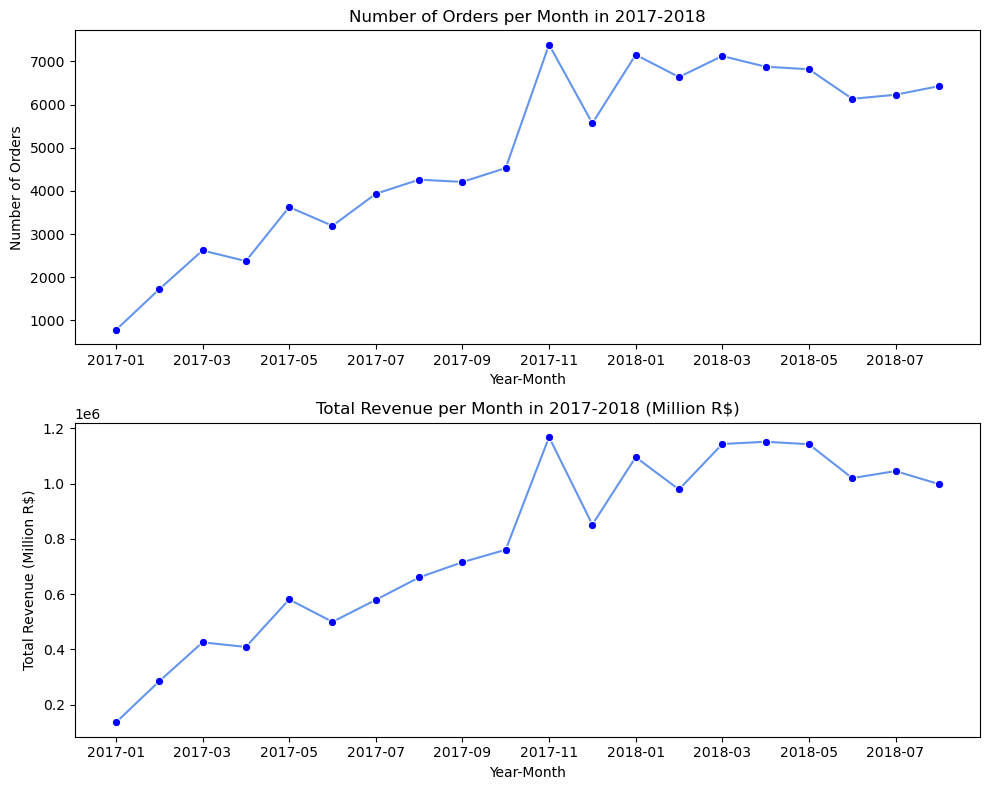

In [95]:
# Membuat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot untuk order count
sns.lineplot(data=monthly_orders_df, x='order_purchase_timestamp', y='order_count', ax=axes[0], marker="o",
             color="cornflowerblue", markerfacecolor="blue")
axes[0].set_title('Number of Orders per Month in 2017-2018')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Number of Orders')

# Plot untuk total revenue
sns.lineplot(data=monthly_orders_df, x='order_purchase_timestamp', y='revenue', ax=axes[1], marker="o", 
             color="cornflowerblue", markerfacecolor="blue")
axes[1].set_title('Total Revenue per Month in 2017-2018 (Million R$)')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Total Revenue (Million R$)')

# Membatasi xticks untuk readablity
x = monthly_orders_df.order_purchase_timestamp
interval = 2
axes[0].set_xticks(x[::interval])
axes[1].set_xticks(x[::interval])

# Menyesuaikan plot layout
plt.tight_layout()

plt.show()

Berdasarkan kedua visualisasi di atas, dapat ditarik beberapa insight:
- Tren keseluruhannya meningkat baik dari segi jumlah pesanan maupun total revenue, terjadi peningkatan terus menerus dari waktu ke waktu. Hal ini menunjukkan bahwa perusahaan e-commerce ini terus mengalami pertumbuhan yang signifikan.
- Terdapat sedikit pola musiman, dengan jumlah pesanan dan total revenue lebih tinggi pada paruh kedua tahun. Hal ini mungkin disebabkan oleh peningkatan pengeluaran selama musim liburan.
- Peningkatan jumlah pesanan terbesar terjadi antara bulan Oktober dan November 2017. Hal ini mungkin disebabkan oleh sejumlah faktor, seperti peluncuran lini produk baru atau kampanye pemasaran, dll yang tidak dapat kita ketahui lebih lanjutnya karena terbatasnya informasi.

### Pertanyaan 2: Kategori produk mana yang paling diminati dan yang paling kurang diminati dalam hal penjualan?

Untuk menjawab pertanyaan ini, yang dilakukan pertama kali adalah mengelompokkan data all_df berdasarkan kategori produk, kemudian menghitung jumlah order untuk setiap kategori tersebut. Selanjutnya kategori dan jumlah order terurutnya ditampilkan dalam bentuk horizontal barplot bersisian antara produk paling diminati dan yang paling tidak diminati dalam hal penjualan.

In [96]:
category_sum_order_df = all_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
category_sum_order_df.columns = ['category', 'order_count']
category_sum_order_df.head(15)

,category,order_count
0,bed_bath_table,10767
1,health_beauty,8771
2,sports_leisure,7669
3,computers_accessories,6649
4,furniture_decor,6398
5,housewares,5843
6,watches_gifts,5576
7,telephony,4168
8,auto,3877
9,toys,3853


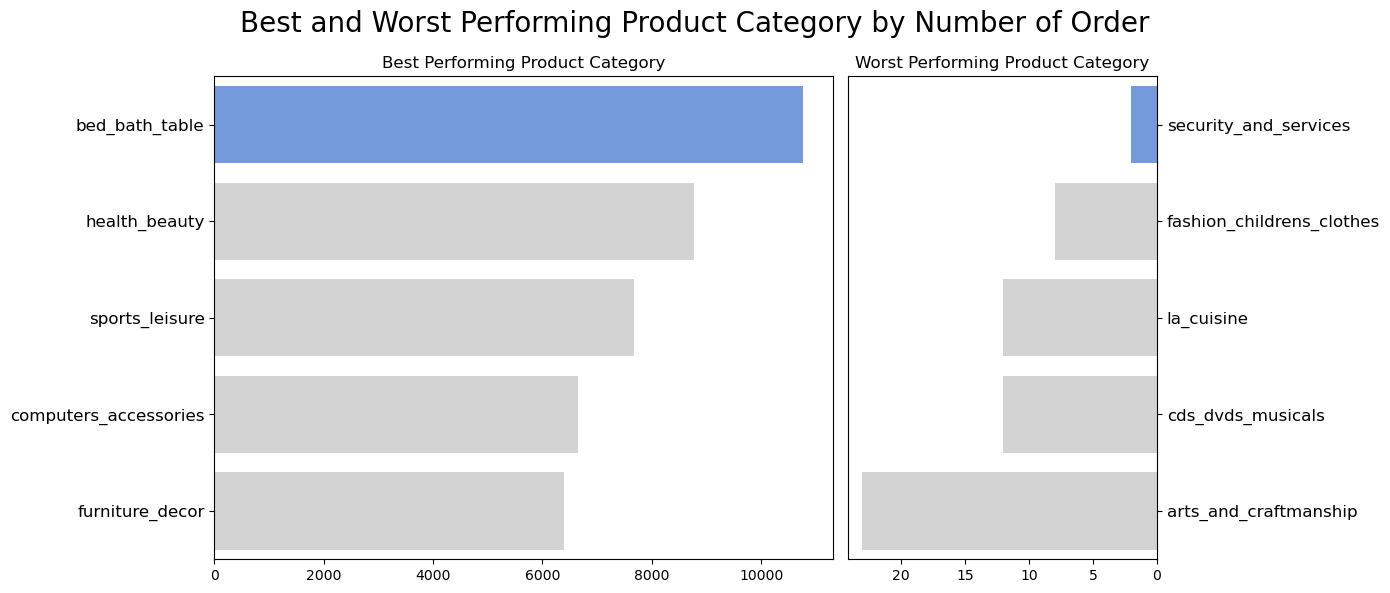

In [97]:
# Membuat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
 
colors = ["cornflowerblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

# Plot untuk best product category
sns.barplot(x="order_count", y="category", data=category_sum_order_df.head(5), palette=colors, ax=axes[0])
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].set_title("Best Performing Product Category", loc="center")
axes[0].tick_params(axis ='y', labelsize=12)
 
# Plot untuk worst product category
sns.barplot(x="order_count", y="category", data=category_sum_order_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=axes[1])
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title("Worst Performing Product Category", loc="center")
axes[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product Category by Number of Order", fontsize=20)

# Menyesuaikan plot layout
plt.tight_layout()

plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa kategori `bad_bath_table` merupakan produk yang paling diminati dalam hal penjualan karena memiliki jumlah order terbanyak. Sedangkan, kategori produk yang paling tidak diminati dengan jumlah order paling sedikit adalah kategori `security_and_services`.  

### Pertanyaan 3: Produk kategori mana yang menghasilkan revenue tertinggi dan terendah?

Untuk menjawab pertanyaan ini, yang dilakukan pertama kali adalah mengelompokkan data all_df berdasarkan kategori produk, seperti halnya pada pertanyaan ke-2 namun yang dihitung adalah total revenue (`order_item_value`) untuk setiap kategori tersebut. Selanjutnya kategori dan revenue terurutnya ditampilkan dalam bentuk horizontal barplot bersisian antara produk yang menghasilkan revenue tertinggi dan terendah.

In [98]:
category_revenue_df = all_df.groupby("product_category_name_english").order_item_value.sum().sort_values(ascending=False).reset_index()
category_revenue_df.columns = ['category', 'revenue']
category_revenue_df.head(15)

,category,revenue
0,bed_bath_table,1440612.72
1,health_beauty,1429127.77
2,watches_gifts,1296184.44
3,sports_leisure,1148621.78
4,computers_accessories,1053386.34
5,furniture_decor,894300.92
6,housewares,773055.10
7,cool_stuff,710791.12
8,auto,676869.58
9,garden_tools,580055.92


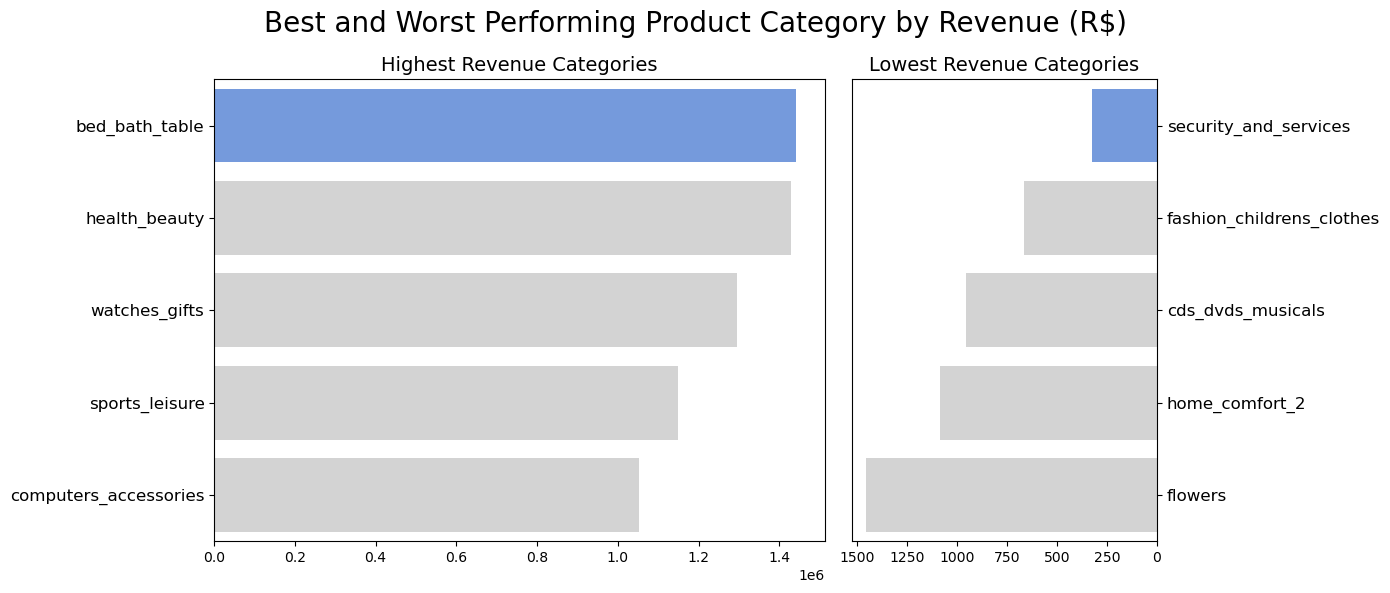

In [99]:
# Membuat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
 
colors = ["cornflowerblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

# Plot untuk best product category
sns.barplot(x="revenue", y="category", data=category_revenue_df.head(5), palette=colors, ax=axes[0])
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].set_title("Highest Revenue Categories", loc="center", fontsize=14)
axes[0].tick_params(axis ='y', labelsize=12)
 
# Plot untuk worst product category
sns.barplot(x="revenue", y="category", data=category_revenue_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=axes[1])
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title("Lowest Revenue Categories", loc="center", fontsize=14)
axes[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product Category by Revenue (R$)", fontsize=20)

# Menyesuaikan plot layout
plt.tight_layout()

plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa kategori `bad_bath_table` merupakan produk menghasilkan revenue paling tinggi. Sebaliknya, kategori `security_and_services`menghasilkan revenue yang paling rendah. Top 1 Best and Worst Performing Product Category adalah sama, baik berdasarkan penjualan atau jumlah order, maupun berdasarkan total revenue yang dihasilkan.

### Pertanyaan 4: Bagaimana demografi pelanggan yang kita miliki?

Berdasarkan data e-commerce ini, demografi pelanggan yang dapat kita amati adalah persebaran pelanggan disetiap kota dan di setiap negara bagian. Pertama kita akan mengambil data pelanggan dan mengelompokkannya berdasarkan kota dan negara bagian dan menampilkan dalam bentuk barplot.

In [100]:
# Menghitung jumlah customer di setiap negara bagian
bystate_df = all_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bystate_df.head()

,customer_state,customer_count
0,AC,77
1,AL,396
2,AM,140
3,AP,66
4,BA,3220


In [101]:
# Menghitung jumlah customer di setiap kota
bycity_df = all_df.groupby(by="customer_city").customer_unique_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bycity_df.head()

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2


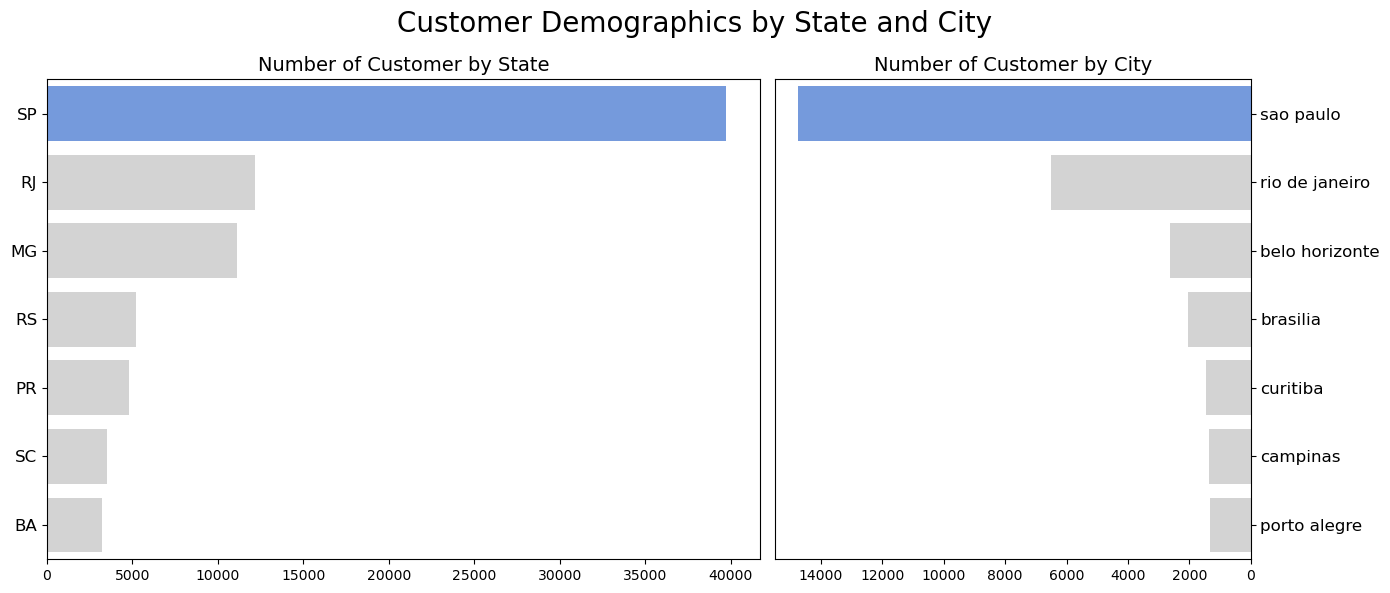

In [102]:
# Membuat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 2]})
 
colors = ["cornflowerblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

# Plot untuk best product category
sns.barplot(x="customer_count", y="customer_state", data=bystate_df.sort_values(by="customer_count", ascending=False).head(7), 
            palette=colors, ax=axes[0])
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].set_title("Number of Customer by State", loc="center", fontsize=14)
axes[0].tick_params(axis ='y', labelsize=12)
 
# Plot untuk worst product category
sns.barplot(x="customer_count", y="customer_city", data=bycity_df.sort_values(by="customer_count", ascending=False).head(7), 
            palette=colors, ax=axes[1])
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title("Number of Customer by City", loc="center", fontsize=14)
axes[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Customer Demographics by State and City", fontsize=20)

# Menyesuaikan plot layout
plt.tight_layout()

plt.show()

Visualisasi menunjukkan bahwa jumlah pelanggan bervariasi menurut negara bagian dan kota. Negara bagian dengan pelanggan terbanyak adalah São Paulo, Rio de Janeiro, dan Minas Gerais dan kota dengan pelanggan terbanyak adalah São Paulo, Rio de Janeiro, dan Belo Horizonte, dengan **dominan pelanggan berada pada São Paulo** baik dalam lingkup kota maupun negara bagian.

### Pertanyaan 5: Siapa saja pelanggan terbaik berdasarkan analisis RFM?

Pertanyaan ini sekaligus dapat menjawab pertanyaan-pertanyaan lain terkait analisis RFM (Recency, Frequency, Monetary) seperti:
- Kapan terakhir kali pelanggan melakukan pembelian?
- Seberapa sering pelanggan melakukan transaksi pembelian?
- Berapa banyak uang yang dihabiskan pelanggan dalam transaksi pembelian?

Untuk perhitungannya, seperti yang sudah dilakukan pada bagian Exploratory Data Analysis untuk menentukan Best Customer dengan hasil pengelompokkan data dalam dataframe rfm_df. Pelanggan terbaik akan divisualisasikan dalam bentuk barplot berdasarkan setiap parameter analisis RFM, yaitu berdasarkan pemesanan terakhir (Recency), pemesanan terbanyak atau yang paling sering (Frequency), dan pemesanan dengan revenue atau value moneter tertinggi (Monetary).

In [103]:
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,119
2,0000f46a3911fa3c0805444483337064,1,86.22,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,326
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,293


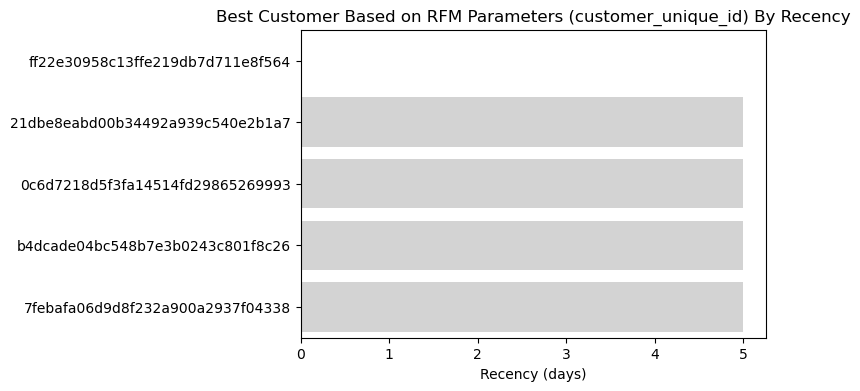

In [104]:
colors = ["cornflowerblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

# For Recency (days)
plt.figure(figsize=(6, 4))
sns.barplot(x="recency", y="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors)
plt.title("Best Customer Based on RFM Parameters (customer_unique_id) By Recency", fontsize=12)
plt.xlabel("Recency (days)")
plt.ylabel(None)
plt.xticks()
plt.show()

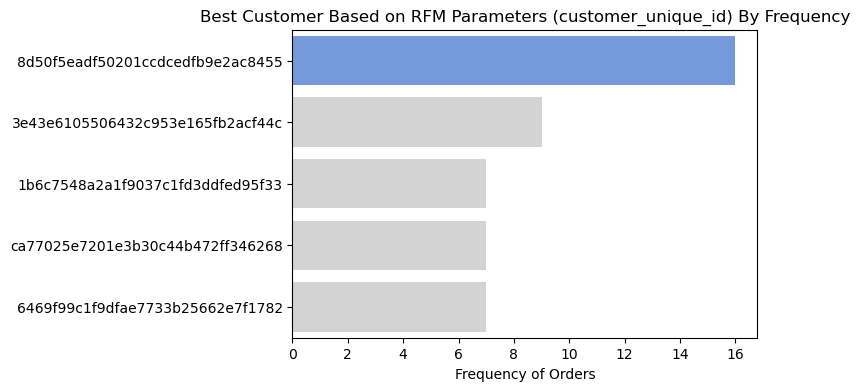

In [105]:
# For Frequency
plt.figure(figsize=(6, 4))
sns.barplot(x="frequency", y="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
            palette=colors)
plt.title("Best Customer Based on RFM Parameters (customer_unique_id) By Frequency", fontsize=12)
plt.xlabel("Frequency of Orders")
plt.ylabel(None)
plt.xticks()
plt.show()

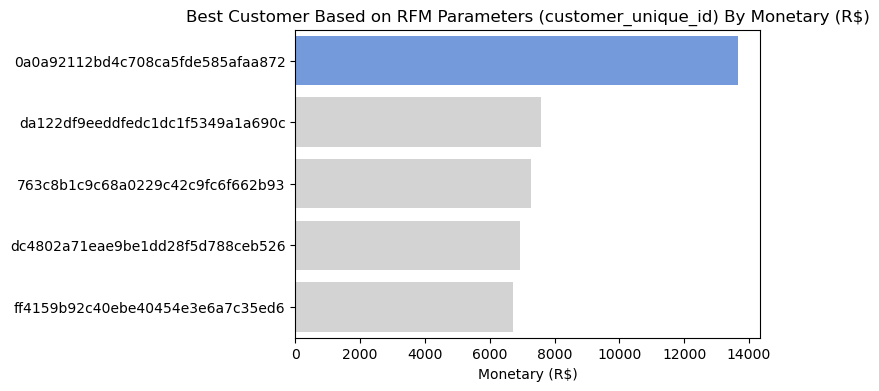

In [106]:
# For Monetary (R$)
plt.figure(figsize=(6, 4))
sns.barplot(x="monetary", y="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
            palette=colors)
plt.title("Best Customer Based on RFM Parameters (customer_unique_id) By Monetary (R$)", fontsize=12)
plt.xlabel("Monetary (R$)")
plt.ylabel(None)
plt.xticks()
plt.show()

Berdasarkan analisis RFM dan visualisasinya, kita dapat mengetahui pelanggan terbaik pada setiap parameter RFM, seperti yang dapat dilihat pada ketiga horizontal barplot di atas. Sedangkan untuk jawaban pertanyaan-pertanyaan mendetail lainnya adalah:
 - (Recency) Pelanggan terakhir kali melakukan pemesanan pada **0 hari** yang lalu terhitung hingga akhir order date pada dataset ini, kemudian beberapa pelanggan lainnya belanja **5 hari** sebelum pemesanan terakhir tersebut.
 - (Frequency) Frekuensi pemesanan pelanggan bervariasi, namun pelanggan yang paling sering belanja sebanyak **16 kali**. 
 - (Monetary) Dalam melakukan transaksi, pengeluaran pelanggan bermacam-macam tergantung pesanan dan produk yang dibeli. Pelanggan yang menghabiskan uang paling banyak, memiliki pengeluaran sebesar **R\$ 13,664.08** untuk keseluruhan transaksi yang pernah dilakukannya di platform e-commerce ini.

## Conclusion

- Analisis kinerja penjualan dan pendapatan selama dua tahun terakhir (2017-2018) mengungkapkan tren peningkatan yang konsisten, baik dari segi jumlah pesanan maupun total pendapatan. Terdapat pola musiman yang ringan, dengan pesanan dan pendapatan cenderung lebih tinggi pada paruh kedua tahun, yang kemungkinan besar dipengaruhi oleh belanja pada masa liburan. Lonjakan pesanan terbesar tercatat antara bulan Oktober dan November 2017, yang mungkin disebabkan oleh berbagai faktor seperti peluncuran produk atau kampanye pemasaran.

- Dalam hal kategori produk, "bed_bath_table" menjadi yang paling sukses berdasarkan jumlah pesanan, sedangkan kategori "security_and_services" memiliki performa terlemah.

- Dari segi pendapatan, kategori "bed_bath_table" menghasilkan pendapatan tertinggi, sementara "security_and_services" memiliki pendapatan terendah. Performa kategori produk ini secara konsisten berkorelasi baik dengan jumlah pesanan dan analisis pendapatan yang dihasilkan.

- Analisis demografi pelanggan mengungkapkan variasi dalam distribusi pelanggan antar negara bagian dan kota. São Paulo, Rio de Janeiro, dan Minas Gerais mendominasi dalam jumlah pelanggan baik di tingkat negara bagian maupun kota, dengan São Paulo menjadi lokasi yang paling dominan bagi pelanggan.

- Dalam analisis RFM (Recency, Frequency, Monetary), ditemukan pelanggan terbaik berdasarkan parameter Kekinian, Frekuensi, dan Moneter. Pelanggan terbaik berdasarkan Kekinian melakukan pembelian terakhirnya sekitar 0 hari yang lalu terhitung hingga akhir order date pada dataset ini, kemudian beberapa pelanggan lainnya belanja 5 hari sebelum pemesanan terakhir tersebut, sementara pelanggan paling sering melakukan sekitar 16 pesanan. Dalam hal nilai Moneter, pelanggan dengan pembelanjaan tertinggi telah menghabiskan sekitar R$13.664,08 untuk total transaksinya.

In [107]:
# Menyimpan data all_df dalam file CSV
all_df.to_csv("main_data.csv", index=False)